# Importing libries

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# To improve vizualization
%matplotlib inline

## Reading Data

In [14]:
df = pd.read_csv('T1.csv')

In [15]:
# Data vizualizating
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


## Data Manipulating

In [16]:
# Drop data wich not necessary
del df['Wind Direction (°)']

In [17]:
# Data vizualizating
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh)
0,01 01 2018 00:00,380.047791,5.311336,416.328908
1,01 01 2018 00:10,453.769196,5.672167,519.917511
2,01 01 2018 00:20,306.376587,5.216037,390.900016
3,01 01 2018 00:30,419.645905,5.659674,516.127569
4,01 01 2018 00:40,380.650696,5.577941,491.702972
...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503


In [19]:
# Updating 'Data/Time' to kind datetime in pandas

df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [20]:
# Data vizualizating
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


## Data Ploting in Graphics - Real

<Axes: xlabel='Wind Speed (m/s)', ylabel='LV ActivePower (kW)'>

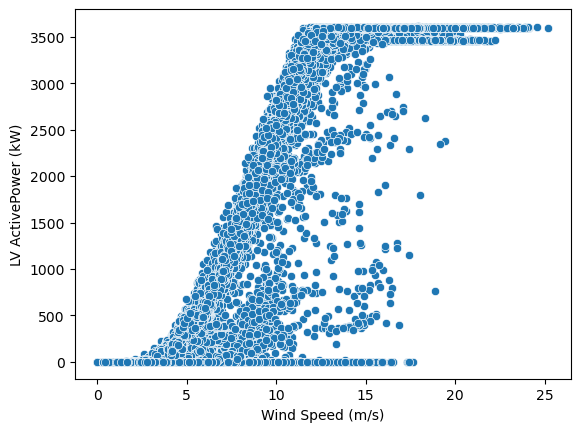

In [22]:
df_power_by_wind_real = sns.scatterplot(data = df,
                                   x='Wind Speed (m/s)',
                                   y = 'LV ActivePower (kW)')
df_power_by_wind_real

## Data Ploting in Graphics - Theorical

<Axes: xlabel='Wind Speed (m/s)', ylabel='Theoretical_Power_Curve (KWh)'>

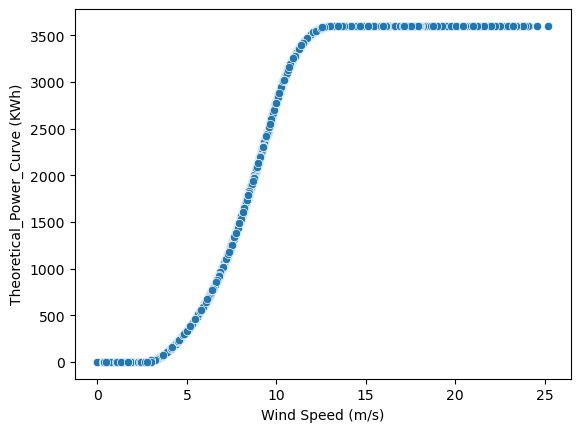

In [23]:
df_power_by_wind_theorical= sns.scatterplot(data = df,
                                       x='Wind Speed (m/s)',
                                       y = 'Theoretical_Power_Curve (KWh)')
df_power_by_wind_theorical

## Setting "acceptable limits"

In [31]:
# Tranforming columns to list
pot_real = df['LV ActivePower (kW)'].to_list()
pot_teoric = df['Theoretical_Power_Curve (KWh)'].to_list()

# Creating lists wich will receave max and min values of 5%
pot_max = [potence*1.05 for potence in pot_teoric]
pot_min = [potence*0.95 for potence in pot_teoric]

# Checking list size
print(len(pot_max),len(pot_min))

50530 50530


## Setting values inside, zero or out

In [34]:
# Creating an empty list
df_limit = []

# Add values in list
for p, potence in enumerate(pot_real):
    if potence >= pot_min[p] and potence<=pot_max[p]:
        df_limit.append('Inside')
    elif potence == 0:
        df_limit.append('Zero')
    else:
        df_limit.append('Out')
        
# Veryfing howmuch values are within in the limite
print(df_limit.count('Inside')/len(df_limit))

0.37286760340391845


## Add list 'df_limit' in dataframe

In [35]:
df['InsideLimit'] = df_limit

In [37]:
# Viewing the new DataFrame
df

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),InsideLimit
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Out
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Out
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Out
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Out
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Out
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Out
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Out
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Out
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Inside


## Ploting the new DataFrame

<Axes: xlabel='Wind Speed (m/s)', ylabel='LV ActivePower (kW)'>

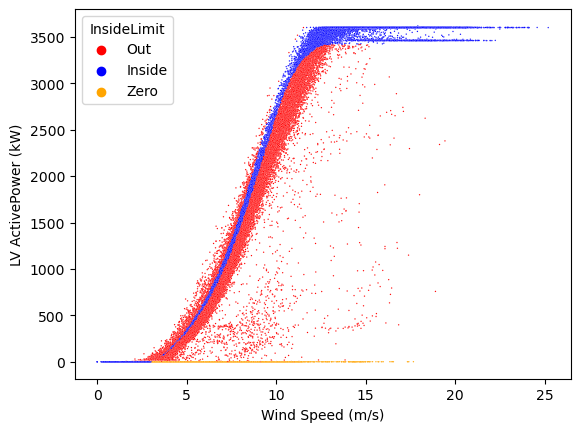

In [41]:
# Defining colors
colors= {'Inside':'blue', 'Out':'red','Zero':'orange' }

# Ajusting the graphic for the better vizualization
sns.scatterplot(data = df, x='Wind Speed (m/s)', y = 'LV ActivePower (kW)',
                hue = 'InsideLimit', s=1, palette = colors)